In [ ]:
#| default_exp data

In [ ]:
#| export
from fastcore.utils import *
from fastcore.test import *
import pandas as pd

In [ ]:
#| hide
from nbdev.showdoc import *

This project uses two years of data for a French photovoltaïc site between the period August 2020 up to August 22. The main sources of data are French electricity spot prices and the production load curve for the site.

The spot price data is collected from [ENTSOE](https://www.entsoe.eu/) and can be found under the `data` folder. The `load_spot_price` function is a wrapper around the import call to directly use the spot price data.

In [ ]:
#| export
def get_spot_price() -> pd.Series:
    """Load french spot price data."""
    return pd.read_csv("data/spot_price.csv", index_col=0, parse_dates=[0], date_parser=lambda d: pd.to_datetime(d, utc=True))["spot_price"].tz_convert("Europe/Paris")

Let's load the data and see what's inside...

In [ ]:
df_spot_price = get_spot_price()

In [ ]:
df_spot_price.to_frame().head()

,spot_price
time,
2020-08-01 00:00:00+02:00,37.96
2020-08-01 01:00:00+02:00,32.40
2020-08-01 02:00:00+02:00,31.01
2020-08-01 03:00:00+02:00,28.29
2020-08-01 04:00:00+02:00,27.45


Europe truly is in a unique situation regarding its electricity market as the following price time series suggests:

<AxesSubplot:xlabel='time'>

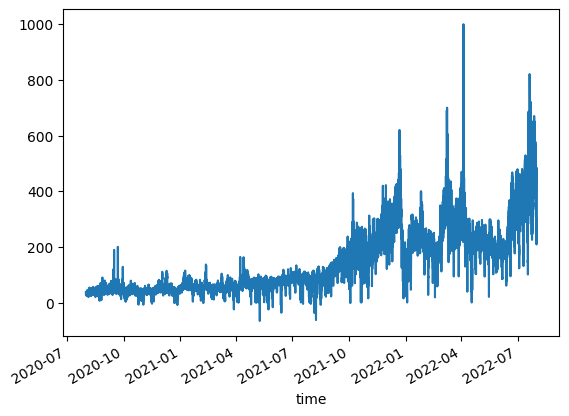

In [ ]:
df_spot_price.clip(upper=1000).plot()

Make sure that we will always get this dataset without missing data.

In [ ]:
test_eq(df_spot_price.shape, (17520,))
test_eq(df_spot_price.isna().any(), False)

In [ ]:
#| export
def get_production(site_id: int = 1) -> pd.Series:
    """Get production data for site `site_id`."""
    if site_id != 1:
        raise ValueError("Sites with id different than 1 currently not supported.")
    
    return pd.read_csv(f"data/production_{site_id}.csv", index_col=0, parse_dates=[0], date_parser=lambda d: pd.to_datetime(d, utc=True))["prod"].tz_convert("Europe/Paris")

In [ ]:
df_production = get_production()

Let's see what the production looks like over the full two year period...

<AxesSubplot:xlabel='time'>

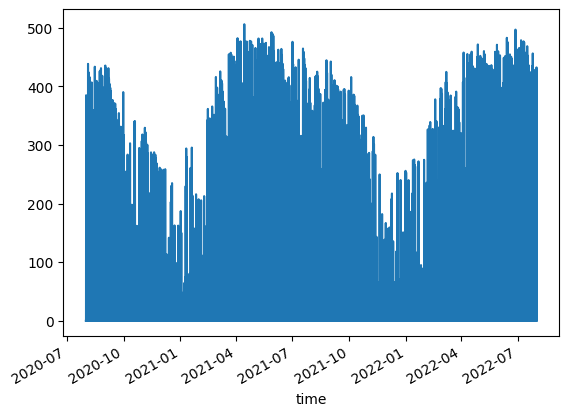

In [ ]:
df_production.plot()

As might seem obvious, the production during the winter months is significantly lower than the summer months.